# Abstract:
In this project, natural language processing (NLP) model is developed to make prediction about person's personality type using Myers Briggs Personality test (MBTI). 

# Introduction:
The Myers–Briggs Type Indicator (MBTI) is an introspective self-report questionnaire indicating differing psychological preferences in how people perceive the world and make decisions. The test attempts to assign four categories: introversion or extraversion, sensing or intuition, thinking or feeling, judging or perceiving. One letter from each category is taken to produce a four-letter test result, like "INFJ" or "ENFP". (Source: Wikipedia)

# Dataset:
This project has four parts which looks at different aspects of person's personality. This notebook is looking at predicting four categories: introversion or extraversion, sensing or intuition, thinking or feeling, judging or perceiving in people by analyzing their social media posts.
Dataset for this project is mainly from Kaggle website complemented by tweets consisting the personality tags.
Dataset: https://www.kaggle.com/datasnaek/mbti-type
The web scraping algorithm to acquire tweets is reflected in Web_scarping notebook.

# Preprocessing:
The first part of the project is data exploration and labeling. Data exploration will give an intuition about how to go about the Machine learning algorithm. We are using supervised learning in which the data has been already labeled, however, we need to determine which posts are related to introverts.This can be done by looking at "I" in "INFP" and classify those labels as an introvert person. Example below demonstrates how the data generally looks like:
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
type/posts
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
type: INFJ.	                                                                                                                Post: and intj moments   sportscenter not top ten plays    pranks|||What has been the most life-changing experience in your life?|||  On repeat for most of today.|||May the PerC Experience immerse you.|||The last thing my INFJ friend posted on his facebook before committing suicide the next day. Rest in peace~   ENFJ7. Sorry to hear of your distress. It's only natural for a relationship to not be perfection all the time in every moment of existence. Try to figure the hard times as times of growth, as...|||84389  84390   ...|||Welcome and stuff.||| Game. Set. Match.|||Prozac, wellbrutin, at least thirty minutes of moving your legs (and I don't mean moving them while sitting in 


In [1]:
import seaborn as sns
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline

In [2]:
dataset = pd.read_csv('mbti.csv')

In [3]:
D=dataset.iloc[:]

In [4]:
X = D.iloc[:, :-1].values
Y = D.iloc[:, -1].values

In [5]:
from collections import Counter
my_dt = pd.DataFrame(X)
Lx = [i[0] for i in my_dt.values.tolist()]
result = {}    
for word in Lx:                                                                                                                                                                                               
    result[word] = result.get(word, 0) + 1    

In [6]:
D={k: v for k, v in sorted(result.items(), key=lambda item: item[1])}

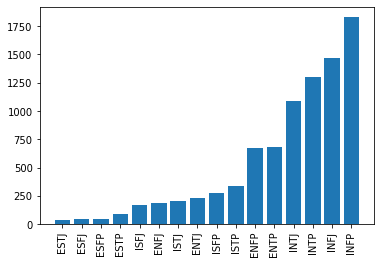

In [7]:
import matplotlib.pyplot as plt
plt.bar(range(len(D)), list(D.values()), align='center')
plt.xticks(range(len(D)), list(D.keys()))
plt.xticks(rotation=90)
plt.show()

# Data preprocessing:
Preprocessing of data is first and foremost is to classify the four main personality groups. Latter classification is based on the provided labels and to train a supervised machine learning classifier. Latter is to determine if the social media posts are, for example,  from an introverted or extroverted person.


In [8]:
#storing all the text
I1=[]
I2=[]
I3=[]
I4=[]
I5=[]
N=0

for i in range (0,len(Y)):
    I1.append(Y[i])
    
    if X[i][0][0]=='I':
        I2.append("I")
    
    if X[i][0][0]=='E':
        I2.append("E")
        
    if X[i][0][1]=='N':
        I3.append("N")
    
    if X[i][0][1]=='S':
        I3.append("S")  
        
    if X[i][0][2]=='F':
        I4.append("F")
    
    if X[i][0][2]=='T':
        I4.append("T")          
        
    if X[i][0][3]=='P':                   
        I5.append("P")
    
    if X[i][0][3]=='J':
        I5.append("J")
        
    

In [9]:
p1 = pd.Series([item for item in I1])
p2 = pd.Series([item for item in I2])
p3 = pd.Series([item for item in I3])
p4 = pd.Series([item for item in I4])
p5 = pd.Series([item for item in I5])

II=pd.DataFrame({"words":p1,"Intorvert":p2,"Intuit":p3,"Feeling":p4,"Precieve":p5})

# NLP model
I used Spacy pre-trained NLP package which is famous and accurate. It will tokenize and reduce the vector space by ignoring unimportant words such as am, is are... For processing. TFIDF bigram and unigram model are used which in addition to each word's frequency, it also look at two nearest words for more accurate results.

In [10]:
import spacy
import string
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English
nlp = spacy.load('en_core_web_sm')

In [11]:
punctuations = string.punctuation

# Create our list of stopwords

stop_words = spacy.lang.en.stop_words.STOP_WORDS

# Load English tokenizer, tagger, parser, NER and word vectors
parser = English()

# Creating our tokenizer function
def spacy_tokenizer(sentence):
    # Creating our token object, which is used to create documents with linguistic annotations.
    sentence= re.sub("[^a-zA-Z]"," ", sentence)
    sentence= re.sub(r'\b\w{1,3}\b', '', sentence)
    mytokens = parser(sentence)

    # Lemmatizing each token and converting each token into lowercase
    mytokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]

    # Removing stop words
    mytokens = [ word for word in mytokens if word not in stop_words and word not in punctuations ]

    # return preprocessed list of tokens
    return mytokens

In [12]:
# Custom transformer using spaCy
class predictors(TransformerMixin):
    def transform(self, X, **transform_params):
        # Cleaning Text
        
        return [clean_text(text) for text in X]

    def fit(self, X, y=None, **fit_params):
        return self

    def get_params(self, deep=True):
        return {}

# Basic function to clean the text
def clean_text(text):
    # Removing spaces and converting text into lowercase
    return text.strip().lower()

In [13]:
bow_vector = CountVectorizer(tokenizer = spacy_tokenizer, ngram_range=(1,2))

In [14]:
tfidf_vector = TfidfVectorizer(tokenizer = spacy_tokenizer)

# Machine Learning:
Logestic reggression was selected among 6 different classifier showing the best results. Logestic reggresion ustilizes the sigmoid function for classification and demonstrated the promissing results in NLP world. 

In [15]:
import numpy as np
X_train=II["words"]
y_multilabel=np.c_[II["Intorvert"],II["Intuit"],II["Feeling"],II["Precieve"]]

In [16]:
from sklearn.preprocessing import OrdinalEncoder
Inp=y_multilabel

ordinal_encoder = OrdinalEncoder()
Iencd = ordinal_encoder.fit_transform(Inp)


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train,Iencd, test_size = 0.2, random_state = 42)

In [18]:
import re
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
#Training the model using parameters from the grid search
classifier = LogisticRegression(penalty='l2',dual=False, tol=0.1, C=0.01, fit_intercept=True, intercept_scaling=1, class_weight=None, random_state=10,solver='liblinear', max_iter=500, multi_class='auto', verbose=0, warm_start=False, n_jobs=None, l1_ratio=None)
# Create pipeline using Bag of Words
pipe = Pipeline([("cleaner", predictors()),
                 ('vectorizer', bow_vector),
                 ('classifier', OneVsRestClassifier(classifier))])

# model generation
pipe.fit(X_train,y_train)

Pipeline(memory=None,
         steps=[('cleaner', <__main__.predictors object at 0x00000221D5DE0D88>),
                ('vectorizer',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 2), preprocessor=None,
                                 stop_words=None, strip_accents=No...
                                 tokenizer=<function spacy_tokenizer at 0x00000221CC4960D8>,
                                 vocabulary=None)),
                ('classifier',
                 OneVsRestClassifier(estimator=LogisticRegression(C=0.01,
                                                                  class_weight=None,
                                                 

In [19]:
from sklearn.metrics import precision_score
predicted1 = pipe.predict(X_test)
precision_score(y_test, predicted1, average='macro')

0.8401478600474191

In [20]:
from sklearn import metrics
# Predicting with a test dataset
predicted1 = pipe.predict(X_test)
#sklearn.metrics.f1_score
print("logestic Accuracy:",metrics.f1_score(y_test, predicted1, labels=None, pos_label=1, average='micro', sample_weight=None, zero_division='warn'))


logestic Accuracy: 0.8519845250035822


In [21]:
import dill
import gzip
with gzip.open('Fullmodel.dill2.gzip', 'wb') as f:
    dill.dump(pipe, f, recurse=True)

In [22]:
with gzip.open('Fullmodel.dill1.gzip', 'rb') as f2:
    model2= dill.load(f2)


In [32]:
import sklearn

In [33]:
print(sklearn.__version__)

0.22.1


# Model has 0.82 accuracy in average, to recognize people's personality type from their social media posts

The hyper-parameters in logistic regression was obtained using Grid search CV which implement cross validation to optimize hyper parameters. 

# Full Model:
Similar kind of methodology could be used to look at different asspects of personality in addition to introvetdness. Author expanded this model to look at sensing or intuition, thinking or feeling, judging or perceiving personality types.

In [23]:
def ID(predict):
    IE=[]
    NS=[]
    FT=[]
    PJ=[]
    L=[]
    for i in range (len(predict)):
        if predict[i][0]==1:          
            IE.append("I")
        else:
            IE.append("E")
        if predict[i][1]==1:
            NS.append("N")
        else:
            NS.append("S")
        if predict[i][2]==1:
            FT.append("F")
        else:
            FT.append("T")
        if predict[i][3]==1:
            PJ.append("P")
        else:
            PJ.append("J")
        L.append(IE[i]+NS[i]+ FT[i]+PJ[i])
    return L
        
        

In [24]:
St=str()
IEt=[]
NSt=[]
FTt=[]
PJt=[]
for j in range (len(y_test)):
    if y_test[j][0]==1:
        St="I"
        IEt.append(St)
    else:
        St="E"
        IEt.append(St)
        
    if y_test[j][1]==1:
        St="N"
        NSt.append(St)
    else:
        St="S"
        NSt.append(St)
        
    if y_test[j][2]==1:
        St="F"
        FTt.append(St)
    else:
        St="T"
        FTt.append(St)
        
    if y_test[j][3]==1:
        St="P"
        PJt.append(St)
    else:
        St="J"
        PJt.append(St)
PERSt=[]
St=str()
for i in range(len(IEt)):
    St=IEt[i]+NSt[i]+FTt[i]+PJt[i]
    PERSt.append(St)    

In [25]:
PERS=ID(predicted1)

In [26]:
dictionary = dict(zip(PERS, PERSt))
dictionary 

{'ESFP': 'ISTJ',
 'ISFJ': 'INTJ',
 'ISFP': 'ISFP',
 'ESTJ': 'ISTP',
 'ISTJ': 'ISTJ',
 'ISTP': 'ISTJ',
 'ESTP': 'ESTP',
 'INFP': 'INFP',
 'INFJ': 'INFJ',
 'INTP': 'INTP',
 'INTJ': 'INTJ',
 'ENFP': 'ENTP',
 'ESFJ': 'ESFJ',
 'ENFJ': 'ESFP',
 'ENTP': 'INTP'}

# Interesting case study:
One interesting application for this study could be to predict the personality type of famous tweeter users. For example we look at the personality type of president elect Joe Biden.

Following is the analysis of the personality type of Joe Biden.

In [27]:
!pip install tweepy

In [28]:
import tweepy
consumer_key='nKzFqkTzhT697GAsiW16TlkUc'
consumer_secret='3dnxrzKtcG5BjXmX12lg7dySf99J9x23dn6PTjnPBwOYQsEXJz'

auth = tweepy.AppAuthHandler(consumer_key, consumer_secret)

In [29]:
# Creation of the actual interface, using authentication
api = tweepy.API(auth)
Txx=[]
for status in tweepy.Cursor(api.user_timeline, screen_name='@JoeBiden', tweet_mode="extended").items(1000):
    Txx.append(status.full_text)
Txx

['RT @Transition46: Readout of President-elect Biden’s briefing on COVID-19 response and vaccination strategy: \n\nhttps://t.co/epetoF8NyT http…',
 'Stay in line, Georgia. If you’re in line at your polling place by 7 PM, you can vote.',
 'Georgia voters: If you’re voting in the county where you’re registered, you’re entitled to ask for a provisional ballot if you’re told you aren’t on the voter rolls. Don’t leave without voting.\n\nIf you have questions, call the Voter Protection Hotline: 888-730-5816',
 'Georgia — If you elect @ReverendWarnock and @Ossoff, we can break the gridlock that has gripped Washington.\n\nWe’ll be able to make the progress we need to make on jobs, health care, justice, and more.\n\nIt all comes down to today. Vote: https://t.co/RIJ1L4B5o9\n\n📷: @kevloweryphoto https://t.co/FMfNZvI6gR',
 'Georgia — If you have any questions today while voting, reach out to the Voter Protection Hotline: 1-888-730-5816',
 'Georgia — The nation is looking to you to lead us forward

In [30]:
d={}
L=[]
s=str()
import spacy
nlp = spacy.load("en_core_web_sm")
for t in Txx:   
    doc = nlp(t)
    for sent in doc.sents:
        if sent[0].is_title and sent[-1].is_punct:
            has_noun = 2
            has_verb = 1
            for token in sent:
                if token.pos_ in ["NOUN", "PROPN", "PRON"]:
                    has_noun -= 1
                elif token.pos_ == "VERB":
                    has_verb -= 1
            if has_noun < 1 and has_verb < 1:
                 L.append(sent.string.strip())

In [31]:
NP=pipe.predict(L)

In [32]:
NP.shape

(988, 4)

First column indicates introverted person, second column indicates sensing type, third column is feeling, and fourth is perceiving.

In [33]:
np.mean(NP, axis=0)

array([0.96862348, 0.01821862, 0.88967611, 0.88562753])

In [34]:
import altair as alt

source = alt.pd.DataFrame([
      {
        "question": "I/E",
        "type": "Introversion",
        "value": 0.97626419,
        "percentage": 90,
        "percentage_start": 0,
        "percentage_end": 97
      },
      {
        "question": "N/S",
        "type": "Intuition",
        "value":  0.00928793,
        "percentage": 0.1,
        "percentage_start": 0,
        "percentage_end": 1
      },
      {
        "question": "F/T",
        "type": "Feeling",
        "value": 0.9494324,
        "percentage": 90,
        "percentage_start": 0,
        "percentage_end": 94
      },
      {
        "question": "P/J",
        "type": "Perceiving",
        "value": 0.9246646,
        "percentage": 90,
        "percentage_start": 0,
        "percentage_end": 92
      },
     
     
])

color_scale = alt.Scale(
    domain=[
        "Introversion",
        "Intuition",
        "Feeling",
        "Perceiving"
    ],
    range=["#c30d24", "#f3a583", "#cccccc", "#94c6da"]
)

y_axis = alt.Axis(
    title="Joe Biden's MBTI",
    offset=5,
    ticks=False,
    minExtent=60,
    domain=False
)

alt.Chart(source).mark_bar().encode(
    x='percentage_start:Q',
    x2='percentage_end:Q',
    y=alt.Y('question:N', axis=y_axis),
    color=alt.Color(
        'type:N',
        legend=alt.Legend( title='Aspects of personality'),
        scale=color_scale,
    )
)

alt.Chart(...)

# Conclusion:
Multi-label logistic regression is implemented to predict different aspects of a person's personality type base on their social media posts. reached the accuracy of 0.82 and predicted the personality type of president-elect Joe Biden as "ISFP". https://www.wellandgood.com/biden-sanders-trump-mbti/ website predicted "ESFP" as Joe Biden's personality type which is close to our predictions. 